###### Import necessary libraries

In [18]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import entropy
from sklearn.decomposition import PCA

###### Importing the DataSet

In [19]:
file_path = r'.\data.xlsx'
df_sheets = pd.read_excel(file_path, sheet_name=None)

###### Concatenating all sheets into one DataFrame

In [20]:
df = pd.concat([df_sheets['No.14WT'], df_sheets['No.2WT'], df_sheets['No.3'], df_sheets['No.39WT']], ignore_index=True)

###### Displaying first few rows of the merged DataFrame

In [21]:
print(df.head())

         1         2          3          4         5          6          7   \
0  0.170386 -0.010933  76.797684  76.298622  0.021913  88.994217  89.271492   
1 -0.255579 -0.054663  76.797691  76.286621  0.021913  88.898232  89.124474   
2  0.106491  0.032798  76.797691  76.276619  0.021913  88.798195  89.072472   
3  0.085193 -0.076529  76.797691  76.198639  0.021913  88.624199  88.998489   
4 -0.191684 -0.021865  76.797691  76.198639  0.021913  88.598190  88.798485   

          8           9    10  ...         22         23        24         25  \
0  89.298538  25987527.0  0.0  ...  33.899609  -8.676025  8.462113  57.795677   
1  89.201553  25987527.0  0.0  ...  33.899609 -11.310730  9.346518  57.795677   
2  89.098526  25987527.0  0.0  ...  33.899609 -12.321899  8.956940  57.795677   
3  88.998550  25987527.0  0.0  ...  33.899609  -3.357025  7.696170  57.772682   
4  88.898575  25987527.0  0.0  ...  33.899609   0.198975  8.591827  57.789673   

          26         27  28  29  30  3

###### Summary of the data

In [22]:
summary_stats = df.describe()
summary_stats

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4.358000e+03,4359.000000,...,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,2268.000000,698.000000,698.000000,698.000000
mean,-0.006957,7.995373,26.718490,31.018484,233.123004,49.173083,52.559008,38.393627,1.960546e+07,248.875987,...,16.004898,9.580735,11.509742,22.441460,49.796275,52.299616,303.255825,7.742139,13.719401,-5.774462
std,0.040015,18.337095,17.088729,14.454087,188.217741,52.075004,18.549390,19.258270,8.675439e+06,177.862887,...,8.231360,13.583106,12.046868,12.447290,22.921855,23.609032,363.974009,0.448956,1.118352,0.796705
min,-0.255579,-0.238556,0.044193,-9.162272,-0.018689,0.797363,2.403583,0.000000,5.000000e+01,0.000000,...,0.279568,-21.840393,0.936449,0.049013,-1.000620,-4.399920,55.097099,6.997176,11.599745,-6.500510
25%,-0.032104,-0.043731,25.000227,28.600311,12.000000,40.081152,41.595734,39.094746,1.999106e+07,89.000000,...,10.699994,1.745404,5.686858,15.922638,51.004272,58.099731,59.496510,7.397185,12.999762,-6.273007
50%,0.000000,0.000000,27.300236,30.300344,279.703308,42.798126,43.045742,42.594841,2.357443e+07,284.975494,...,11.099993,5.622550,6.246957,18.394682,58.037731,59.599506,63.495625,7.697177,13.799805,-6.100509
75%,0.010701,0.075904,27.700291,30.900410,421.602844,43.424141,49.998222,43.294853,2.357500e+07,426.361923,...,19.099981,10.326499,8.416031,23.444571,59.701267,61.999153,849.000000,8.097169,14.499843,-5.500509
max,0.191948,50.060001,76.797691,76.298622,1021.722295,359.424225,89.271492,89.298538,2.599013e+07,1256.034129,...,35.200993,80.968428,43.266815,57.795677,80.697533,88.297775,849.000000,8.597167,15.599875,-0.827508


###### Identify missing values

In [23]:
missing_values_df = pd.DataFrame({'Column': df.columns, 'Missing Values': df.isnull().sum()})

print(missing_values_df)


    Column  Missing Values
1        1               0
2        2               0
3        3               0
4        4               0
5        5               0
6        6               0
7        7               0
8        8               0
9        9               1
10      10               0
11      11               0
12      12               0
13      13               0
14      14               0
15      15               0
16      16               0
17      17               0
18      18               0
19      19               0
20      20               0
21      21               0
22      22               0
23      23               0
24      24               0
25      25               0
26      26               0
27      27               0
28      28            2091
29      29            3661
30      30            3661
31      31            3661


###### Droping rows with missing values

In [24]:
df.dropna(inplace=True)

###### Plot feature distribution

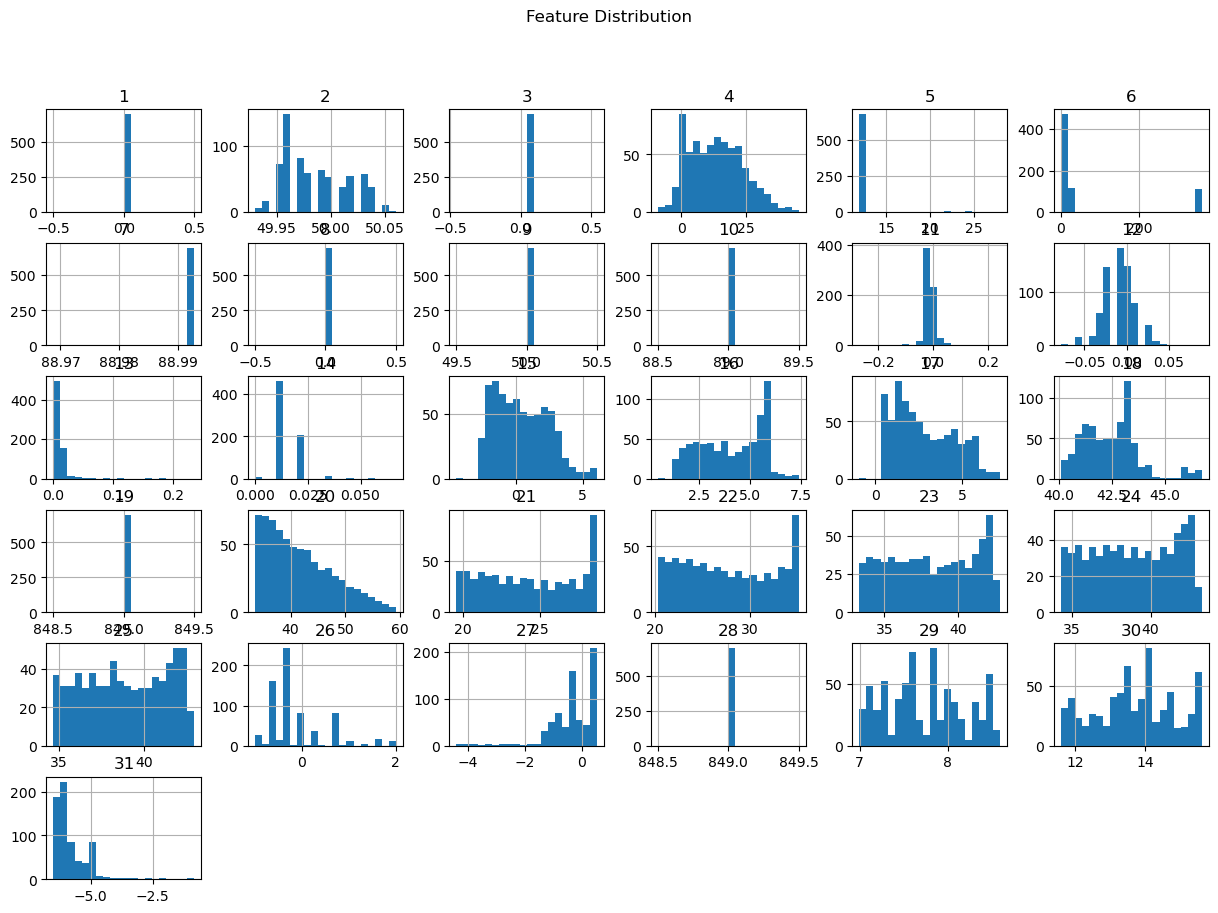

In [25]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distribution')
plt.show()

###### Correlation heatmap

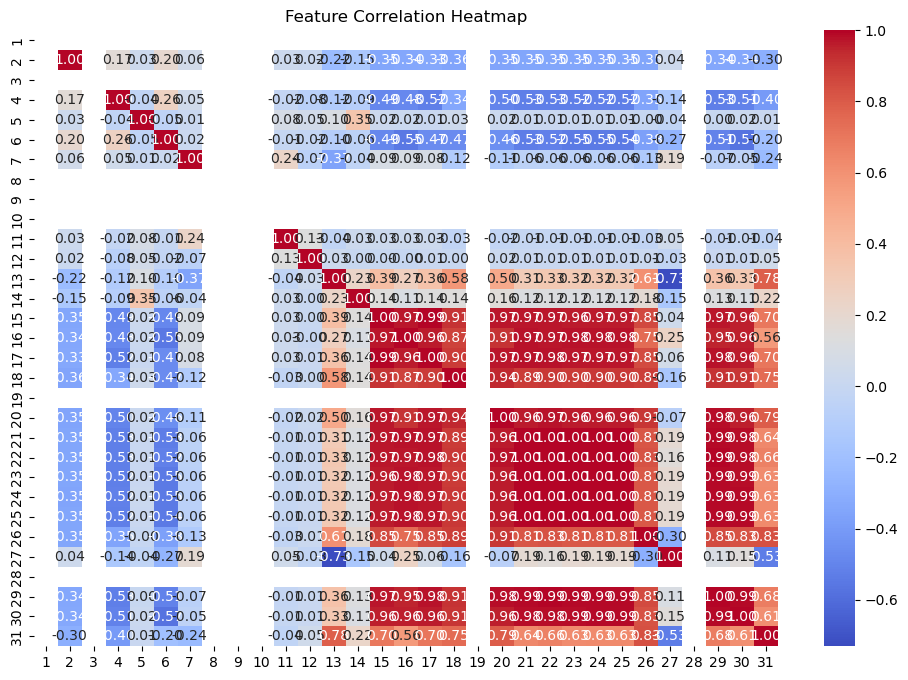

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

###### Pair plot of the features (sampling to avoid overplotting)

In [ ]:
sns.pairplot(df.sample(100))  
plt.suptitle('Pair Plot of Features')
plt.show()

###### Detect outliers using IQR (Interquartile Range)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers in each column:\n", outliers)

##### Removing outliers

In [ ]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nShape of DataFrame after removing outliers:", df_no_outliers.shape)

###### Boxplots for detecting outliers

In [ ]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df[[column]], orient="h", palette="Set2")
    plt.title(f'Boxplot of {column} to Detect Outliers')
    plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplot for All Features to Detect Outliers')
plt.show()

###### Feature distribution after outlier removal

In [ ]:
df_no_outliers.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distribution (After Outlier Removal)')
plt.show()

###### Correlation heatmap after outlier removal

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (After Outlier Removal)')
plt.show()

###### Pair plot after outlier removal

In [ ]:
sns.pairplot(df_no_outliers.sample(100))  
plt.suptitle('Pair Plot of Features (After Outlier Removal)')
plt.show()